In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

## Data Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

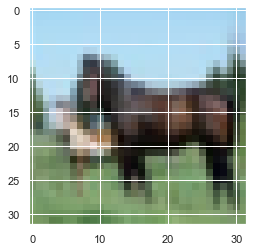

In [4]:
plt.imshow(x_train[12])

In [5]:
# Normalizing the inputs
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [6]:
# Converting y data to categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Model and Trainnig

In [7]:
model = Sequential()

# Convolutinal Layer
model.add(Convolution2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutinal Layer
model.add(Convolution2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# Hidden Layer
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.4879 - accuracy: 0.4609 - val_loss: 1.3942 - val_accuracy: 0.5134
Epoch 2/15
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1461 - accuracy: 0.5937 - val_loss: 1.1449 - val_accuracy: 0.5970
Epoch 3/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0045 - accuracy: 0.6466 - val_loss: 1.0140 - val_accuracy: 0.6504
Epoch 4/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.8992 - accuracy: 0.6853 - val_loss: 0.9755 - val_accuracy: 0.6594
Epoch 5/15
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.8115 - accuracy: 0.7179 - val_loss: 0.9980 - val_accuracy: 0.6546
Epoch 6/15
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.7295 - accuracy: 0.7453 - val_loss: 0.9186 - val_accuracy: 0.6833
Epoch 7/15
50000/50000 [==============================] 

## Model Evaluation

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

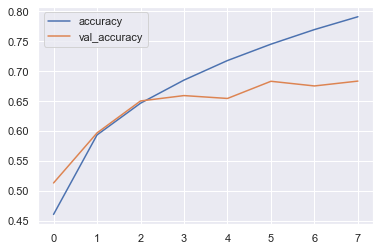

In [15]:
metrics[['accuracy','val_accuracy']].plot()

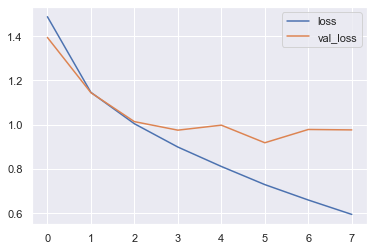

In [17]:
metrics[['loss','val_loss']].plot()

In [23]:
predictions = model.predict_classes(x_test)
predictions

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      1000
           1       0.76      0.85      0.80      1000
           2       0.54      0.63      0.58      1000
           3       0.49      0.54      0.51      1000
           4       0.70      0.56      0.62      1000
           5       0.58      0.59      0.59      1000
           6       0.74      0.76      0.74      1000
           7       0.77      0.74      0.76      1000
           8       0.78      0.78      0.78      1000
           9       0.81      0.71      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



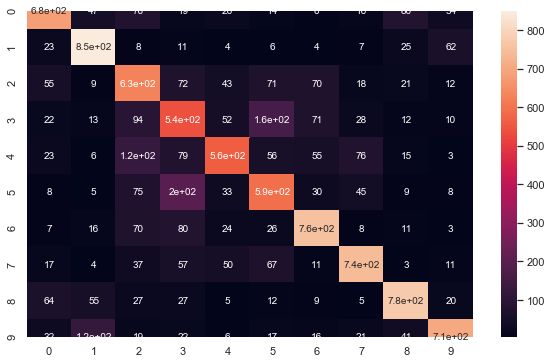

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

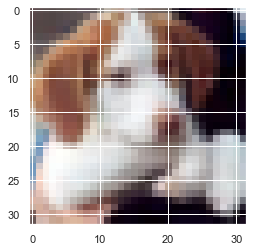

In [37]:
example = x_test[16]
plt.imshow(example)

In [38]:
y_test[16]

array([5], dtype=uint8)

In [39]:
model.predict_classes(example.reshape(1,32,32,3))

array([5], dtype=int64)